- 一个样本有多个特征值
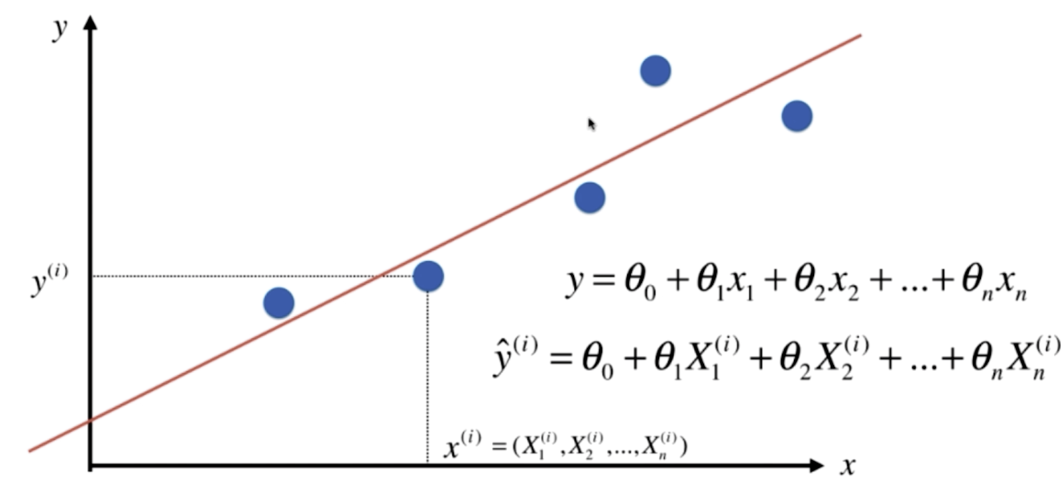
target：使$\sum_{i=1}{m}(y^{(i)} - \hat{y}^{(i)})^{2}$尽可能小
- 原因： 1)线性可导 
- 2)将限制最大的误差尽可能小
- $\hat{y}^{(i)} = \theta_{0} + \theta_{1}X_{1}^{(i)} + \theta_{2}X_{2}^{(i)} + ... + \theta_{n}X_{n}^{(i)}$
- target：找到$\theta_{0} \theta_{1} ... \theta{n}$ 使得$\sum_{i=1}{m}(y^{(i)} - \hat{y}^{(i)})^{2}$尽可能小

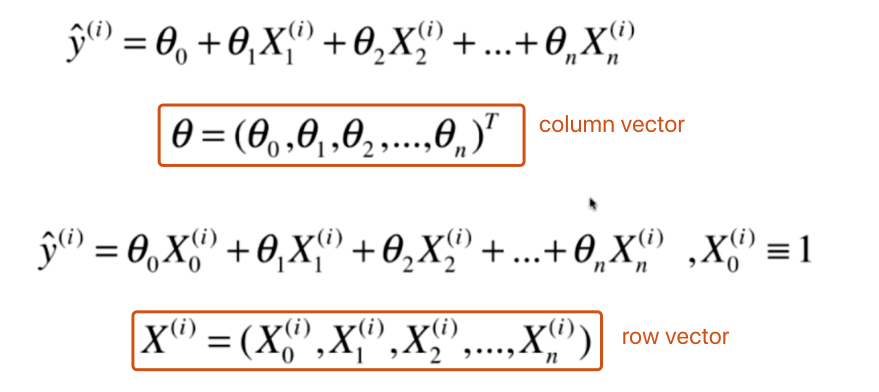

<font size=6>$\hat{y}^{(i)} = X^{(i)}.\theta$</font>
- <font size=5>$\theta 和\hat{y}$ 点乘的结果</font>

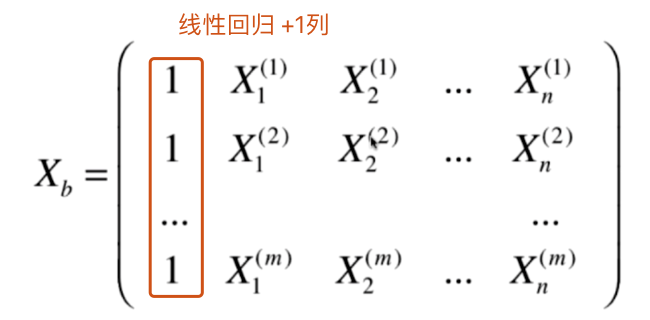

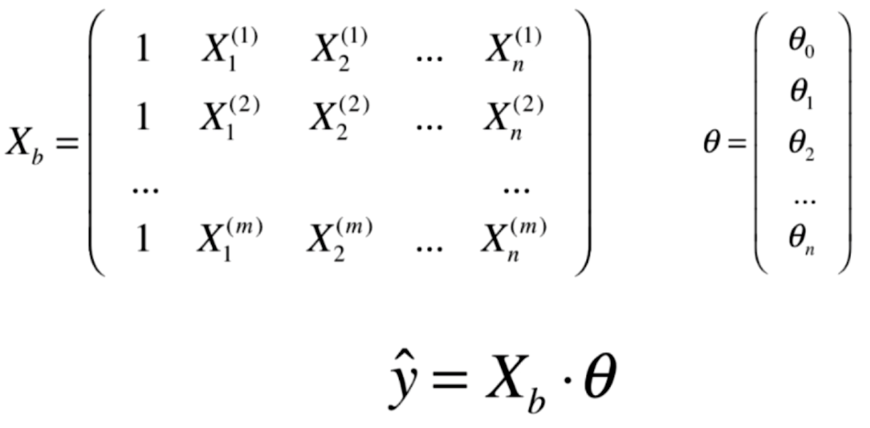

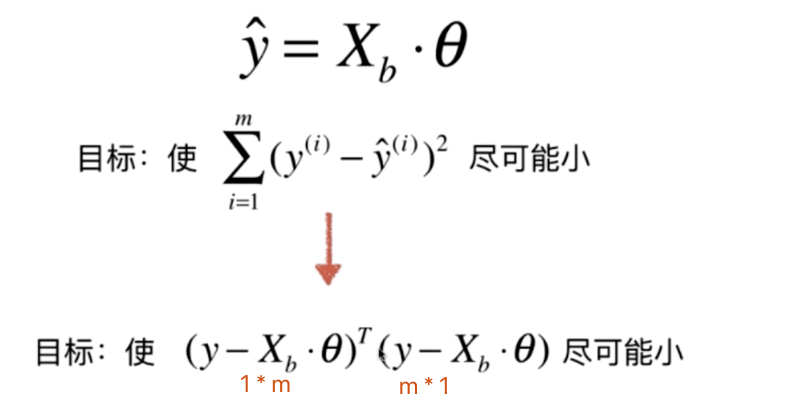
- <font size= 5>思路：对$\theta$每一个值进行求导为0 得到结果</font>
- <font size = 5>多元线性回归的正规方程解(Normal Equation)$\theta = (X_{b}^{T}X_{b})^{-1}X_{b}^{T}y$ </font>
- <font size=5>problem：时间复杂度高$O(n^3)$</font>
- <font size=5>advantage: 不需要对数据做归一化处理</font>

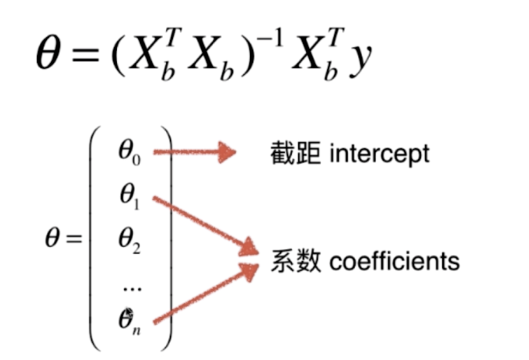
`self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)`

- 将$\theta_{0}$和$\theta_{i}$分开进行 

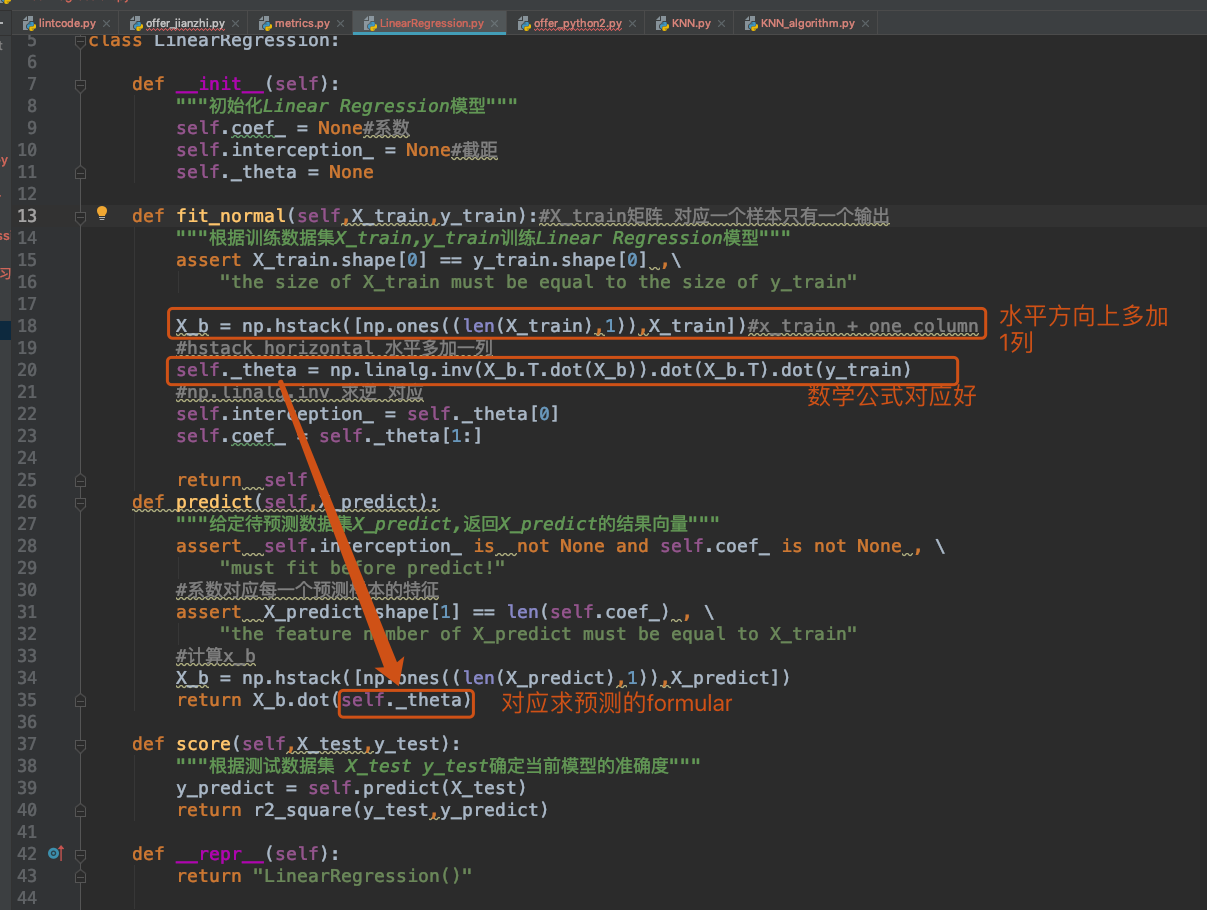

### 实现多元线性回归模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [6]:
X.shape

(490, 13)

In [7]:
from ML_learning.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,seed=666)

In [8]:
from ML_learning.LinearRegression import LinearRegression

reg = LinearRegression()
reg.fit_normal(x_train,y_train)

LinearRegression()

In [9]:
reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [10]:
reg.interception_

34.11739972320805

In [11]:
reg.score(x_test,y_test)

0.8129794056212925

### scikit-learn中的线性回归

In [12]:
from sklearn.linear_model import LinearRegression

lin_arg = LinearRegression()

In [14]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=666)

In [23]:
lin_arg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lin_arg.coef_

array([-1.15625837e-01,  3.13179564e-02, -4.35662825e-02, -9.73281610e-02,
       -1.09500653e+01,  3.49898935e+00, -1.41780625e-02, -1.06249020e+00,
        2.46031503e-01, -1.23291876e-02, -8.79440522e-01,  8.31653623e-03,
       -3.98593455e-01])

In [25]:
lin_arg.intercept_

32.597561588699485

In [26]:
lin_arg.score(x_test,y_test)

0.8009390227581039

### kNN Regressor 处理回归问题

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)
knn_reg.score(x_test,y_test)
#R^2 结果比linearregression要差

0.602674505080953

In [31]:
#对knn的超参数进行实验
#gridsearchcv
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

/Users/ccai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.4s finished
/Users/ccai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
grid_search.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [34]:
grid_search.best_score_
#使用的交叉验证方式 与之前的score方式不同

0.6060528490355778

In [35]:
grid_search.best_estimator_.score(x_test,y_test)
#该socre和前面的指标是在同一维度 使用的同种方式

0.7353138117643773

#### 经验：在做各种算法的比较 不能轻易的看结果 使用了不同的评价标准 注意是用的什么方式比较的（交叉验证 r^2）

## 5-10 线性回归可解释性和更多思考

In [37]:
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()

x = boston.data
y = boston.target

x = x[y < 50.0]
y = y[y < 50.0]

In [40]:
from sklearn.linear_model import LinearRegression

lin_arg = LinearRegression()
lin_arg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lin_arg.coef_

array([-1.06715912e-01,  3.53133180e-02, -4.38830943e-02,  4.52209315e-01,
       -1.23981083e+01,  3.75945346e+00, -2.36790549e-02, -1.21096549e+00,
        2.51301879e-01, -1.37774382e-02, -8.38180086e-01,  7.85316354e-03,
       -3.50107918e-01])

In [42]:
np.argsort(lin_arg.coef_)
# 对应的列属性的index 从负相关 - 正相关

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5])

In [43]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [44]:
boston.feature_names[np.argsort(lin_arg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [45]:
print(boston.DESCR)
# 可解释性-  对应好

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

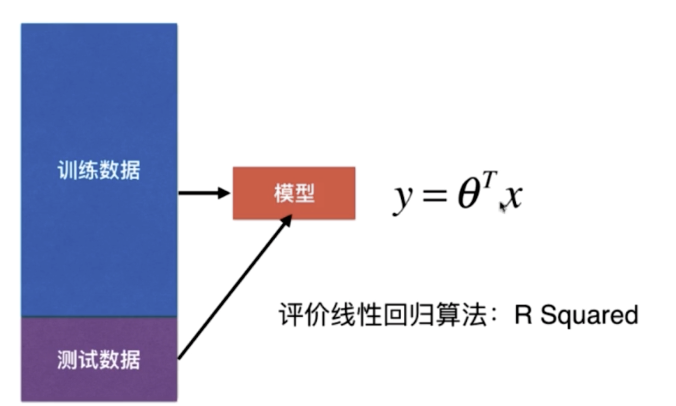

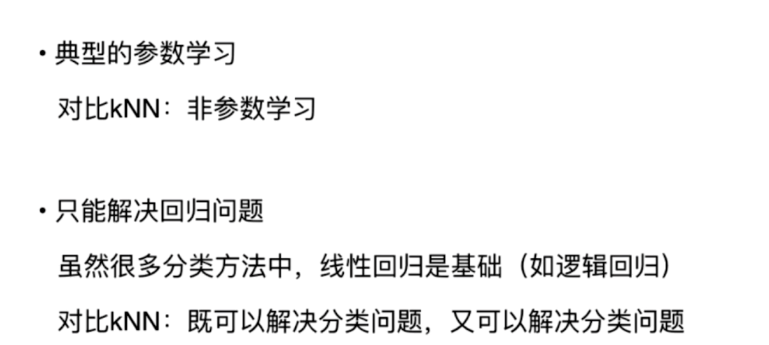
- 线性回归假设 ：线性关系
- knn没有假设
- 当有线性关系 线性回归>knn
- 可以解决非线性关系

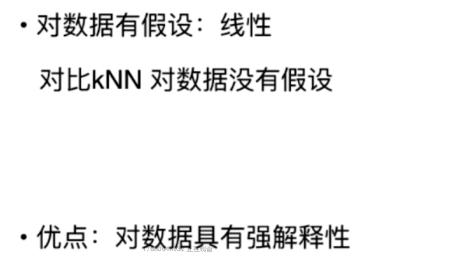
- 对于之前的例子 可以通过比较来得到知识 哪些因素是正相关 哪些是负相关的

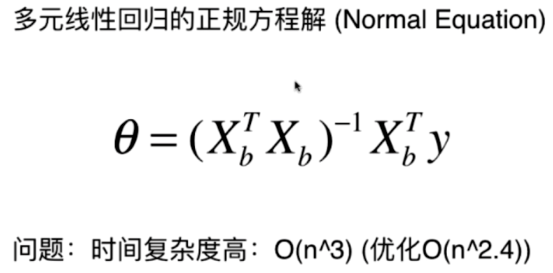